# Análisis de datos con Python

### *Daniel Pablo Kresisch*

##Introducción
En este proyecto se trabajará con la base de datos Alarmix (descargada de la plataforma Kaggle) que se dedica a la venta de productos de seguridad en España.
Se analizarán los datos para transformarlos en información significativa y accionable. Además, se usará Python y las librerías como Pandas, NumPy, Seaborn y Matplotlib que permiten manipular, limpiar, analizar y visualizar los datos de manera eficiente.

En este análisis, se aprovecharán al máximo estas capacidades para obtener resultados claros y fundamentados que respalden la toma de decisiones basada en datos.  

###Hipótesis
La hipótesis de este trabajo sostiene que la mayoría de las ventas se concentran durante las épocas de vacaciones, principalmente en destinos costeros que los turistas eligen como lugar de descanso y recreación.

Estos lugares, debido a la alta cantidad de visitantes, experimentan un incremento significativo en la actividad comercial durante estas temporadas.
Sin embargo, es precisamente en estos momentos de mayor dinamismo turístico y comercial cuando también se registra un aumento considerable en los índices de inseguridad y miedos, afectando tanto a los residentes locales como a los turistas.

### Carga de datos e importación de librerías

In [1]:
# Importación de las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Para que Python no muestre errores
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Conexión con Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Ubicación del dataset
%cd '/content/gdrive/MyDrive/Data Science/Proyecto Final'

/content/gdrive/MyDrive/Data Science/Proyecto Final


###Exploración de datos
En esta sección, se exploró el conjunto de datos para entender sus características. Esto ayudará a identificar patrones y relaciones entre las variables.


In [5]:
# Lectura del dataset
df = pd.read_excel ("Alarmas.xlsx")

In [6]:
# Lectura del dataset y se ven los primeros 5 registros
df = pd.read_excel ("Alarmas.xlsx")
df.head()

,Motivo del estado,Estado de Sector Mobile,Empleado,Instalador Actual,Fecha de Reserva,Fecha de Venta,Precio de Venta,Numero de Cuenta,Instalacion,Precio de Compra,Campaña,Cartera de cliente,Zip Code (Installation),Rama Padre,ID Hardware,Nombre Hardware,Region de venta
0,Programado,Completado,105,105,2024-03-14,2024-03-17,99.0,10103858,165186,39.7,Inhouse/Direct sales,Sector Alarm HOME,38616,TE1,12001,I. Canarias- Kit Proteccion SAS,Andalucía
1,Programado,Completado,108,204,2024-03-16,2024-03-17,99.0,10103906,165249,46.9,Inhouse/Direct sales,Sector Alarm HOME,28300,MD1,10068,KIT Proteccion Plus SAS,Andalucía
2,Programado,Completado,60,60,2024-03-16,2024-03-17,99.0,10103907,165250,44.9,Inhouse/Direct sales,Sector Alarm HOME,8192,BN1,10067,Kit Proteccion SAS,Andalucía
3,Programado,Completado,99,99,2024-03-17,2024-03-17,99.0,10103908,165251,44.9,Inhouse/Direct sales,Sector Alarm HOME,29651,MA1,10068,KIT Proteccion Plus SAS,Andalucía
4,Programado,Completado,96,96,2024-03-17,2024-03-17,397.0,10103915,165258,49.9,Inhouse/Direct sales,Sector Alarm HOME,18640,GR1,10068,KIT Proteccion Plus SAS,Andalucía


In [7]:
# Últimos 5 registros
df.tail()

,Motivo del estado,Estado de Sector Mobile,Empleado,Instalador Actual,Fecha de Reserva,Fecha de Venta,Precio de Venta,Numero de Cuenta,Instalacion,Precio de Compra,Campaña,Cartera de cliente,Zip Code (Installation),Rama Padre,ID Hardware,Nombre Hardware,Region de venta
10562,Aprobado,Completado,140,140,2022-01-02,2022-01-03,299.0,10084721,140851,39.9,Direct Sales,Sector Alarm HOME,29620,MA1,11000,Kit Residencial TC,Islas Baleares
10563,Aprobado,Completado,7,7,2022-01-02,2022-01-02,360.0,10084720,140850,42.0,Inhouse/Direct sales,Sector Alarm HOME,28100,MD1,11000,Kit Residencial TC,Islas Baleares
10564,Aprobado,Completado,3,211,2021-12-29,2022-01-02,240.0,10084643,140768,43.9,Direct Sales,Sector Alarm SSE,4700,AL1,11003,Kit Negocio TC,Islas Baleares
10565,Aprobado,Completado,140,140,2022-01-01,2022-01-02,299.0,10084717,140846,39.9,Direct Sales,Sector Alarm HOME,29620,MA1,11000,Kit Residencial TC,Islas Baleares
10566,Aprobado,Completado,140,140,2022-01-01,2022-01-02,299.0,10084717,140847,39.9,Direct Sales,Sector Alarm HOME,29620,MA1,11000,Kit Residencial TC,Islas Baleares


## **Variables**
Para comprender mejor los datos es necesario conocer la descripción de cada variable del dataset:
*   **Motivo del estado:** Refleja si la venta fue programada o aprobada.
*   **Estado de Sector Mobile:** Muestra si el pedido fue completado.
*   **Empleado:** Menciona el empleado que atendió al cliente.
*   **Instalador Actual:** La persona que se va encargar de la instalación de la alarma.
*   **Fecha de Reserva:** La fecha cuando se reservó la compra de la alarma.
*   **Fecha de Venta:** La fecha que se concretó la venta.
*   **Precio de Venta:** El precio cuando se conretó la venta.
*   **Numero de Cuenta:** El número de cuenta del cliente.
*   **Instalacion:** El código de instalación.
*   **Precio de Compra:** El precio del producto en el momento de compra.
*   **Campaña:** La campaña que se realizó para la venta.
*   **Cartera de cliente:** El tipo de cliente que compró el producto.
*   **Zip Code (Installation):** El lugar donde se realizó la instalación.
*   **Rama Padre:** El término técnico para indentificar el tipo de producto que se vendió.
*   **ID Hardware:** El número de identificación de cada producto.
*   **Nombre Hardware:** El nombre de cada hardware que se vendió.
*   **Region de venta:** La región de España donde son los compradores.

In [8]:
# Conversión de una columna en index
df = df.set_index('ID Hardware')
df

,Motivo del estado,Estado de Sector Mobile,Empleado,Instalador Actual,Fecha de Reserva,Fecha de Venta,Precio de Venta,Numero de Cuenta,Instalacion,Precio de Compra,Campaña,Cartera de cliente,Zip Code (Installation),Rama Padre,Nombre Hardware,Region de venta
ID Hardware,,,,,,,,,,,,,,,,
12001,Programado,Completado,105,105,2024-03-14,2024-03-17,99.0,10103858,165186,39.7,Inhouse/Direct sales,Sector Alarm HOME,38616,TE1,I. Canarias- Kit Proteccion SAS,Andalucía
10068,Programado,Completado,108,204,2024-03-16,2024-03-17,99.0,10103906,165249,46.9,Inhouse/Direct sales,Sector Alarm HOME,28300,MD1,KIT Proteccion Plus SAS,Andalucía
10067,Programado,Completado,60,60,2024-03-16,2024-03-17,99.0,10103907,165250,44.9,Inhouse/Direct sales,Sector Alarm HOME,8192,BN1,Kit Proteccion SAS,Andalucía
10068,Programado,Completado,99,99,2024-03-17,2024-03-17,99.0,10103908,165251,44.9,Inhouse/Direct sales,Sector Alarm HOME,29651,MA1,KIT Proteccion Plus SAS,Andalucía
10068,Programado,Completado,96,96,2024-03-17,2024-03-17,397.0,10103915,165258,49.9,Inhouse/Direct sales,Sector Alarm HOME,18640,GR1,KIT Proteccion Plus SAS,Andalucía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11000,Aprobado,Completado,140,140,2022-01-02,2022-01-03,299.0,10084721,140851,39.9,Direct Sales,Sector Alarm HOME,29620,MA1,Kit Residencial TC,Islas Baleares
11000,Aprobado,Completado,7,7,2022-01-02,2022-01-02,360.0,10084720,140850,42.0,Inhouse/Direct sales,Sector Alarm HOME,28100,MD1,Kit Residencial TC,Islas Baleares
11003,Aprobado,Completado,3,211,2021-12-29,2022-01-02,240.0,10084643,140768,43.9,Direct Sales,Sector Alarm SSE,4700,AL1,Kit Negocio TC,Islas Baleares


In [9]:
# Registros (filas) y atributos (columnas) que presenta el dataset

df.shape

(10567, 16)

In [10]:
# Variables del dataset
df.columns

Index(['Motivo del estado', 'Estado de Sector Mobile', 'Empleado',
       'Instalador Actual', 'Fecha de Reserva', 'Fecha de Venta',
       'Precio de Venta', 'Numero de Cuenta', 'Instalacion',
       'Precio de Compra', 'Campaña', 'Cartera de cliente',
       'Zip Code (Installation)', 'Rama Padre', 'Nombre Hardware',
       'Region de venta'],
      dtype='object')

In [11]:
# Tipos de datos de cada variable
print(df.dtypes)

Motivo del estado                  object
Estado de Sector Mobile            object
Empleado                            int64
Instalador Actual                   int64
Fecha de Reserva           datetime64[ns]
Fecha de Venta             datetime64[ns]
Precio de Venta                   float64
Numero de Cuenta                    int64
Instalacion                         int64
Precio de Compra                  float64
Campaña                            object
Cartera de cliente                 object
Zip Code (Installation)             int64
Rama Padre                         object
Nombre Hardware                    object
Region de venta                    object
dtype: object


In [12]:
# Verificación de valores nulos
print(df.isnull().sum())

Motivo del estado          0
Estado de Sector Mobile    0
Empleado                   0
Instalador Actual          0
Fecha de Reserva           0
Fecha de Venta             0
Precio de Venta            0
Numero de Cuenta           0
Instalacion                0
Precio de Compra           0
Campaña                    0
Cartera de cliente         0
Zip Code (Installation)    0
Rama Padre                 0
Nombre Hardware            0
Region de venta            0
dtype: int64


In [13]:
# Exploración de la información
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Motivo del estado,10567,2,Aprobado,10477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estado de Sector Mobile,10567,1,Completado,10567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empleado,10567.0,NaN,NaN,NaN,174.97161,1.0,65.0,133.0,251.0,675.0,141.356578
Instalador Actual,10567.0,NaN,NaN,NaN,159.893536,1.0,60.0,125.0,227.0,734.0,136.124191
Fecha de Reserva,10567,NaN,NaN,NaN,2023-02-18 15:48:52.260812032,1982-03-07 00:00:00,2022-07-04 00:00:00,2023-03-08 00:00:00,2023-10-14 00:00:00,2024-03-17 00:00:00,NaN
Fecha de Venta,10567,NaN,NaN,NaN,2023-02-21 11:49:26.329137920,2022-01-02 00:00:00,2022-07-05 00:00:00,2023-03-09 00:00:00,2023-10-16 00:00:00,2024-03-17 00:00:00,NaN
Precio de Venta,10567.0,NaN,NaN,NaN,213.337438,0.0,99.0,149.0,250.0,2435.0,186.738968
Numero de Cuenta,10567.0,NaN,NaN,NaN,10095090.405792,10000284.0,10090687.5,10096093.0,10100376.5,10103915.0,6950.714508
Instalacion,10567.0,NaN,NaN,NaN,154430.475159,123926.0,148568.5,155261.0,160740.5,165258.0,7071.41245
Precio de Compra,10567.0,NaN,NaN,NaN,45.308872,0.0,42.0,44.9,49.9,88.4,4.861179


In [14]:
# Estadísticas descriptivas de las variables numéricas
print(df.describe(include=[np.number]))

           Empleado  Instalador Actual  Precio de Venta  Numero de Cuenta  \
count  10567.000000       10567.000000     10567.000000      1.056700e+04   
mean     174.971610         159.893536       213.337438      1.009509e+07   
std      141.356578         136.124191       186.738968      6.950715e+03   
min        1.000000           1.000000         0.000000      1.000028e+07   
25%       65.000000          60.000000        99.000000      1.009069e+07   
50%      133.000000         125.000000       149.000000      1.009609e+07   
75%      251.000000         227.000000       250.000000      1.010038e+07   
max      675.000000         734.000000      2435.000000      1.010392e+07   

         Instalacion  Precio de Compra  Zip Code (Installation)  
count   10567.000000      10567.000000             10567.000000  
mean   154430.475159         45.308872             25377.751396  
std      7071.412450          4.861179             10635.198029  
min    123926.000000          0.000000    

##**Gráficos**
Para comprender mejor los datos se realizaron gráficos con las librerías Matplotlib y Seaborn.

# **MatPlotLib**
Se eligieron cuatro gráficos para verlos con la librería "**Matplotlib**".

### **Productos más vendidos**

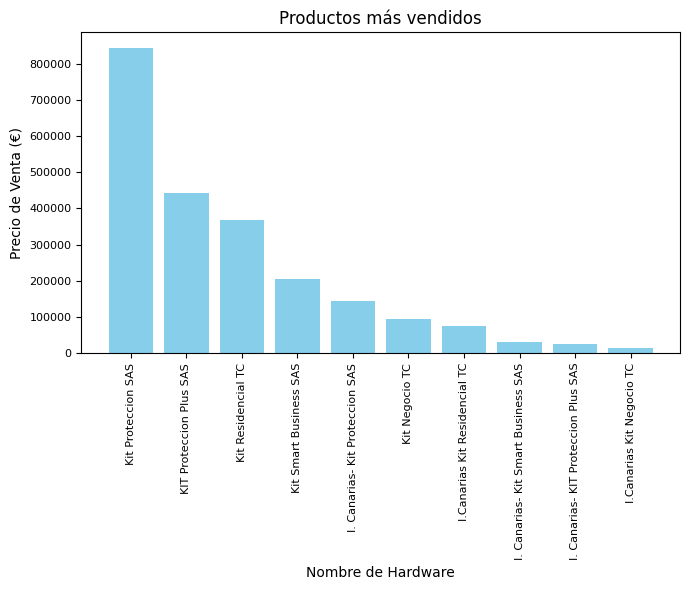

In [15]:
# Filtro de las columnas que se van a utilizar en el gráfico
df_filtered = df[['Nombre Hardware', 'Precio de Venta']]

# Se agrupa por 'Nombre Hardware' y se suma los precios (si hay duplicados), luego se ordena de mayor a menor
df_grouped = df_filtered.groupby('Nombre Hardware').sum().sort_values(by='Precio de Venta', ascending=False)

# Selección el top 10
df_top10 = df_grouped.head(10)

# Creación del gráfico con sus ajustes
plt.figure(figsize=(7, 6))
plt.bar(df_top10.index, df_top10['Precio de Venta'], color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title('Productos más vendidos', fontsize=12)
plt.xlabel('Nombre de Hardware', fontsize=10)
plt.ylabel('Precio de Venta (€)', fontsize=10)

# Se muestra el gráfico
plt.tight_layout()
plt.show()

Se observa que el producto más vendido es Kit Protección SAS, seguido por Kit Protección Plus SAS y Kit Residencial TC, por lo que sería bueno potenciar las ventas de estos últimos dos para que puedan superar o igualarse al producto estrella.

### **Ganancias por producto**

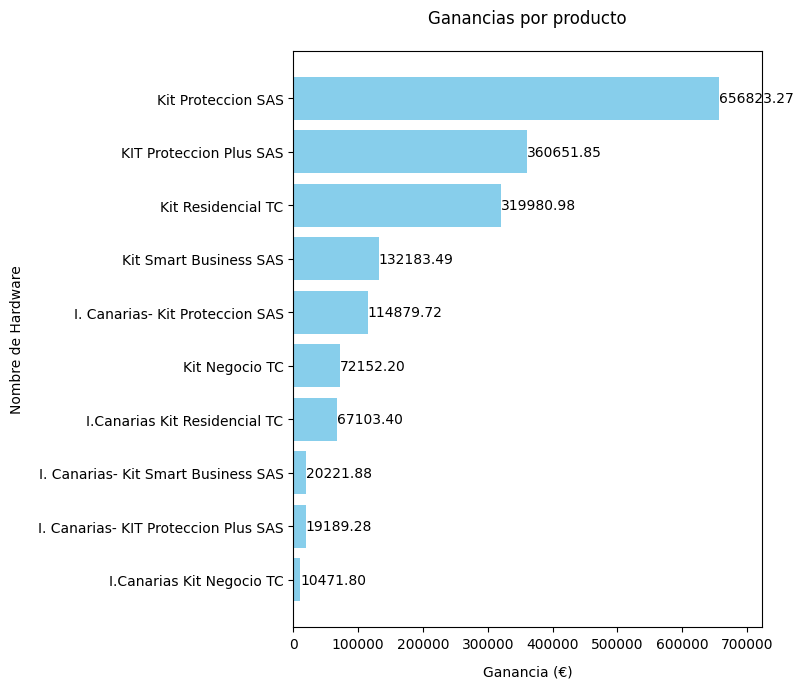

In [16]:
# Cálculo de la ganancia
df['Ganancia'] = df['Precio de Venta'] - df['Precio de Compra']

# Filtro del top 10 de nombre hardware por ganancia
top_10_hardware = df.groupby('Nombre Hardware')['Ganancia'].sum().nlargest(10)

# Creación de un DataFrame para el top 10
df_top10 = top_10_hardware.reset_index()

# Se ordena el DataFrame de mayor a menor
df_top10 = df_top10.sort_values(by='Ganancia', ascending=True)

# Creación de un gráfico de barras para ver la ganancia
plt.figure(figsize=(8, 7))
bars = plt.barh(df_top10['Nombre Hardware'], df_top10['Ganancia'], color='skyblue')

# Ajustes del gráfico
plt.title('Ganancias por producto', fontsize=12, pad=20)
plt.xlabel('Ganancia (€)', fontsize=10, labelpad=10)
plt.ylabel('Nombre de Hardware', fontsize=10, labelpad=10)
plt.xlim(0, df_top10['Ganancia'].max() * 1.1)

# Valores en las barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center', fontsize=10)

# Se muestra el gráfico
plt.tight_layout()
plt.show()

En este gráfico se observan las ganancias que hubo por cada producto, lo que es clave para la toma de decisiones y para evaluar el precio de venta y compra de cada producto.

### **Venta de productos por fecha**

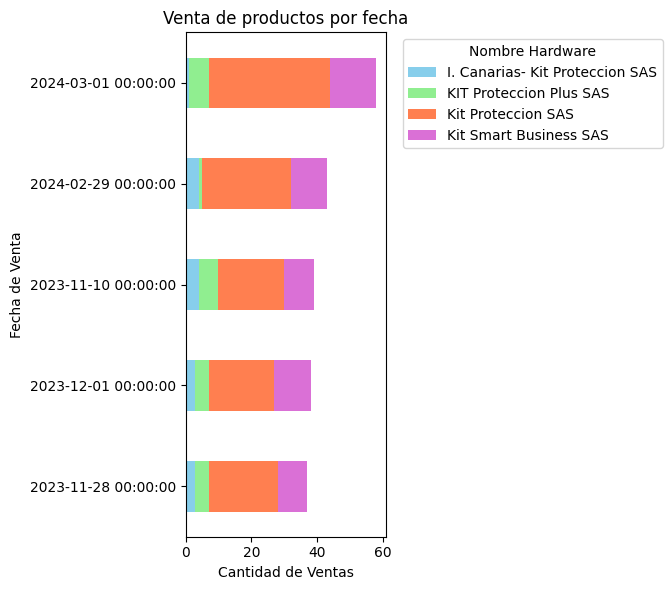

In [17]:
# Filtro de las columnas que se van utilizar
nombre_hardware = df['Nombre Hardware']
fecha_venta = pd.to_datetime(df['Fecha de Venta'])

# Top 5 de hardware más vendidos
top5_hardware = df.groupby('Nombre Hardware').size().nlargest(5)

# Filtro del dataframe con el top 5 hardware
df_top5_hardware = df[df['Nombre Hardware'].isin(top5_hardware.index)]

# Top 5 de fechas con más ventas
top5_fechas = df_top5_hardware.groupby('Fecha de Venta').size().nlargest(5)

# Filtro del dataframe con las 5 fechas más importantes
df_top5_fechas = df_top5_hardware[df_top5_hardware['Fecha de Venta'].isin(top5_fechas.index)]

# Se agrupa por 'Fecha de Venta' y 'Nombre Hardware' para sumar las ventas de cada hardware por fecha
ventas_agrupadas = df_top5_fechas.groupby(['Fecha de Venta', 'Nombre Hardware']).size().unstack(fill_value=0)

# Suma de las ventas por cada fecha y se ordena por la cantidad ventas
ventas_agrupadas['Total Ventas'] = ventas_agrupadas.sum(axis=1)
ventas_agrupadas = ventas_agrupadas.sort_values(by='Total Ventas', ascending=True)

# Se elimina la columna de 'Total Ventas' antes de graficar
ventas_agrupadas = ventas_agrupadas.drop(columns=['Total Ventas'])

# Creación del gráfico de barras apiladas (horizontal) junto con los ajustes
ventas_agrupadas.plot(kind='barh', stacked=True, figsize=(7, 6), color=['skyblue', 'lightgreen', 'coral', 'orchid', 'lightgrey'])
plt.title('Venta de productos por fecha', fontsize=12)
plt.xlabel('Cantidad de Ventas', fontsize=10)
plt.ylabel('Fecha de Venta', fontsize=10)
plt.legend(title='Nombre Hardware', bbox_to_anchor=(1.05, 1), loc='upper left')

# Se muestra el gráfico
plt.tight_layout()
plt.show()

Se observan los productos más vendidos durante la época de mayor ventas, y el producto estrella fue el más vendido. En relación a las fechas, se identificó que las mayores ventas fueron en febrero y marzo (fecha de mayor turismo) y luego, previo a las fiestas de diciembre.


### **Ventas por región**

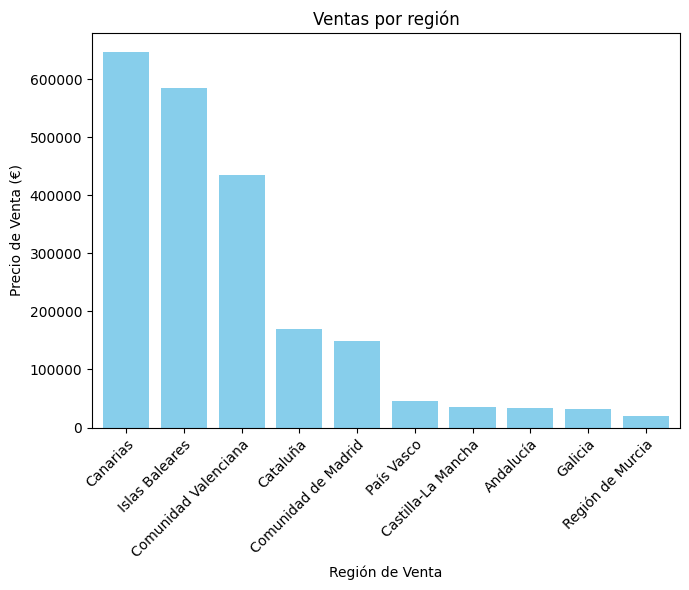

In [18]:
# Filtro de las columnas que se van a utilizar en el gráfico
df_filtered = df[['Region de venta', 'Precio de Venta']]

# Se agrupa por 'Region de ventas' y se suman los precios (si hay duplicados), luego se ordena de mayor a menor
df_grouped = df_filtered.groupby('Region de venta').sum().sort_values(by='Precio de Venta', ascending=False)

# Selección del top 10
df_top10 = df_grouped.head(10)

# Creación del gráfico de barras
plt.figure(figsize=(7, 6))
plt.bar(df_top10.index, df_top10['Precio de Venta'], color='skyblue')

# Ajustes del eje X
plt.xticks(rotation=45, ha='right', fontsize=10, rotation_mode='anchor')
plt.gca().margins(x=0.02)
plt.yticks(fontsize=10)

# Perzonalización del gráfico
plt.title('Ventas por región', fontsize=12)
plt.xlabel('Región de Venta', fontsize=10)
plt.ylabel('Precio de Venta (€)', fontsize=10)

# Se muestra el gráfico
plt.tight_layout()
plt.show()

En este gráfico se observa que las regiones donde hubo mayores ventas fueron los lugares para vacacionar (Canarias, Islas Baleares y Comunidad Valenciana), y las dos grandes regiones (Cataluña y Madrid).

## **Seaborn**
Se eligieron tres gráficos de la librería Seaborn

### **Evolución del Precio de Venta a lo Largo del Tiempo**



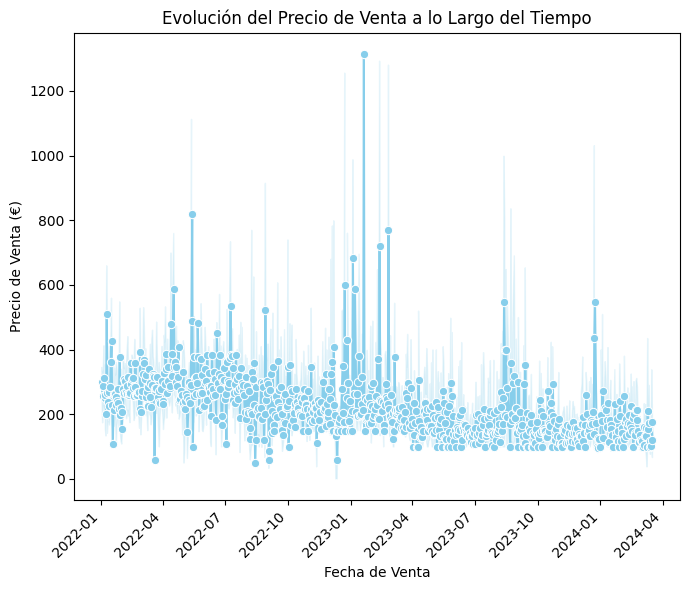

In [19]:
# Confirmación que la columna de fechas esté con en formato correcto
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'], errors='coerce')

# Se ordenan los datos por fecha para ver la evolución en el tiempo
df_sorted = df.sort_values(by='Fecha de Venta')

# Creación del gráfico de líneas con Seaborn
plt.figure(figsize=(7, 6))
sns.lineplot(x='Fecha de Venta', y='Precio de Venta', data=df_sorted, marker='o', color='skyblue')

# Ajustes del gráfico
plt.title('Evolución del Precio de Venta a lo Largo del Tiempo', fontsize=12)
plt.xlabel('Fecha de Venta', fontsize=10)
plt.ylabel('Precio de Venta (€)', fontsize=10)

# Se muestra el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se muestra la evolución histórica del precio de venta en relación a las fechas. Se puede observar que la mayoría de los precios varían entre 100 y 400 Euros.

### **Distribución del Precio de Venta**

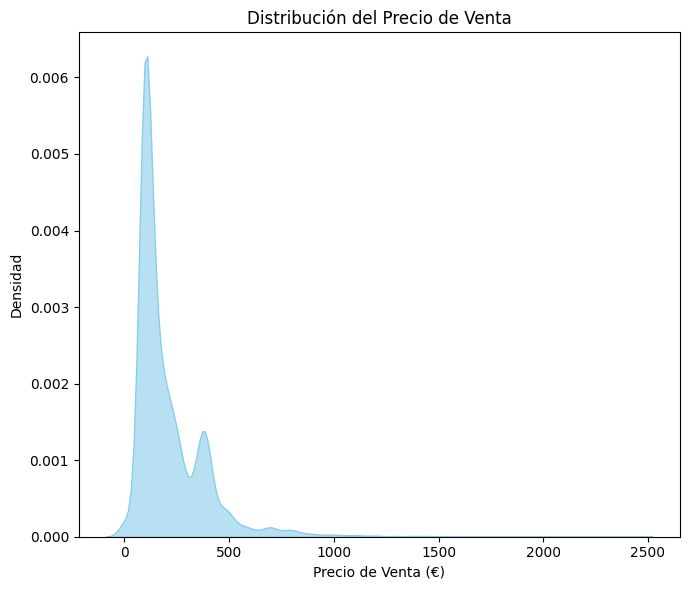

In [20]:
# Creación del gráfico de densidad para la columna 'Precio de Venta'
plt.figure(figsize=(7, 6))
sns.kdeplot(data=df, x='Precio de Venta', fill=True, color='skyblue', alpha=0.6)

# Ajustes del gráfico
plt.title('Distribución del Precio de Venta', fontsize=12)
plt.xlabel('Precio de Venta (€)', fontsize=10)
plt.ylabel('Densidad', fontsize=10)

# Se muestra el gráfico
plt.tight_layout()
plt.show()

En este gráfico se observa el rango de precio de las mayores ventas que, al igual que el gráfico anterior, varía entre los 100 y 400 Euros.

### **Precio de Ventas más Utilizados**

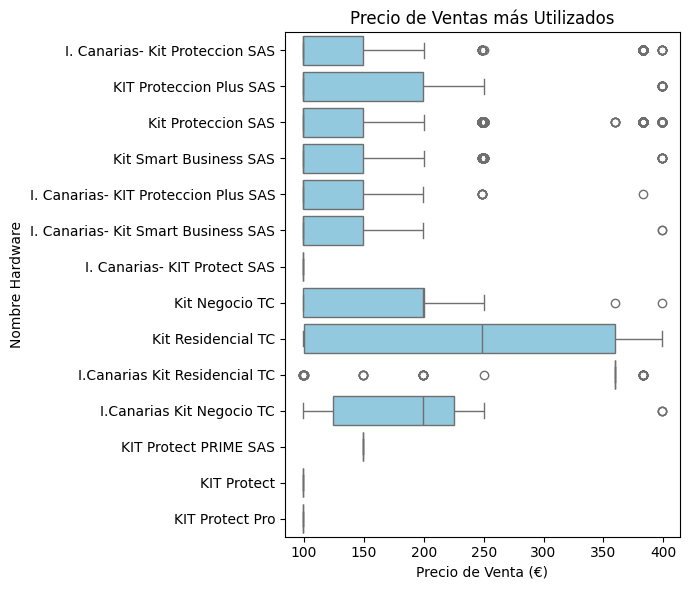

In [21]:
# Filtro con los 10 precios más utilizados
top_10_used_prices = df['Precio de Venta'].value_counts().nlargest(10).index
df_filtered_prices = df[df['Precio de Venta'].isin(top_10_used_prices)]

# Creación de un boxplot para la columna 'Precio de Venta'
plt.figure(figsize=(7, 6))
sns.boxplot(data=df_filtered_prices, x='Precio de Venta', y='Nombre Hardware', color='skyblue')

# Personalización del gráfico
plt.title('Precio de Ventas más Utilizados', fontsize=12)
plt.xlabel('Precio de Venta (€)', fontsize=10)
plt.ylabel('Nombre Hardware', fontsize=10)

# Se muestra el gráfico
plt.tight_layout()
plt.show()

Se utilizó este gráfico para ver la comparación entre el rango de precio que más se vendió y los productos más vendidos. Con el boxplot se puede observar cuáles son la media, mediana y moda para identificar los precios que suelen comprar los clientes.

### Conclusiones

Con toda la exploración y el análisis de los datos y los gráficos, se identificó que existen dos períodos de mayor venta:

*   Entre febrero y marzo: debido a las vacaciones de los países debajo del Ecuador, como en el caso de Sudamérica que suelen viajar para esa época a los lugares turísticos.
*   Entre noviembre y principios de diciembre: debido a las festividades.

Además, se descubrió que los lugares con mayores ventas son justamente los destinos que se eligen para ir de vacaciones.

En conclusión, sería bueno enfocarse y reforzar la presencia en los lugares turísticos que la gente utiliza para irse de vacaciones, ya que es el momento donde las personas quieren sentirse más segura fuera de su hogar.